# Archaeological Data analysis🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

In [4]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [5]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

In [6]:
# Total number of different dinosaur names
different_dinosaurs = dinosaurs['name'].nunique()
print(different_dinosaurs)

1042


## The value 1042 is the total number of different types of dinosaurs discovered so far from different regions.

In [7]:
# Largest dinosaur ever recorded
max_dino_index = dinosaurs['length_m'].idxmax()
largest_dinosaur = dinosaurs.loc[max_dino_index]
print(largest_dinosaur)

occurrence_no          465134
name              Supersaurus
diet              herbivorous
type                 sauropod
length_m                 35.0
max_ma                  155.7
min_ma                  145.0
region               Colorado
lng               -108.397202
lat                 38.583099
class              Saurischia
family           Diplodocidae
Name: 570, dtype: object


## Supersaurus is the largest dinosaur ever recorded. It was herbivorous, belongs to sauropod group and Saurischia family. They are estimated to be up to about 35 meters long. The fossile record found was about 145 to 155 million years old in colorado region.

In [8]:
# Rows missing the maximum length of dinosaur
null_length = dinosaurs[dinosaurs['length_m'].isnull()]
print(null_length)

      occurrence_no            name diet type  length_m  max_ma  min_ma  \
22           144307  Bistahieversor  NaN  NaN       NaN    83.5    70.6   
23           148500    Sonorasaurus  NaN  NaN       NaN   105.3    93.5   
30           149988        Efraasia  NaN  NaN       NaN   228.0   208.5   
65           247238   Sauroposeidon  NaN  NaN       NaN   125.0   100.5   
75           255936      Sphingopus  NaN  NaN       NaN   247.2   237.0   
...             ...             ...  ...  ...       ...     ...     ...   
4939        1350009   Elrhazosaurus  NaN  NaN       NaN   125.0   113.0   
4945        1358696  Othnielosaurus  NaN  NaN       NaN   157.3   145.0   
4946        1360627   Isaberrysaura  NaN  NaN       NaN   171.6   168.4   
4948        1363633  Othnielosaurus  NaN  NaN       NaN   157.3   152.1   
4950        1365108      Luluichnus  NaN  NaN       NaN   139.8   125.0   

                 region         lng        lat         class  \
22           New Mexico -107.966393

## The null value in the field length_m may be due to the lack of proper study and evidences on fossile record.

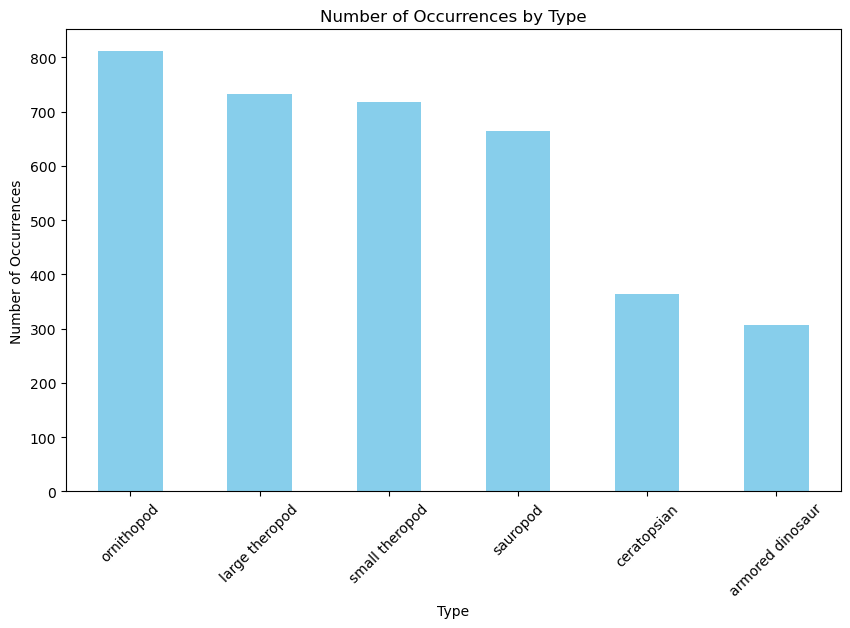

In [9]:
# Visualizing type by number of their occurrences
import matplotlib.pyplot as plt
type_counts = dinosaurs['type'].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences by Type')
plt.xlabel('Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

## Ornithopod is the most common type in the given dataset.

In [10]:
# Average of max_ma and min_ma
dinosaurs['average'] = dinosaurs[['max_ma', 'min_ma']].mean(axis=1)
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family,average
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae,126.23
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae,126.23
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae,77.05
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae,77.05
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae,77.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN,170.00
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae,154.70
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN,154.70
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN,142.40


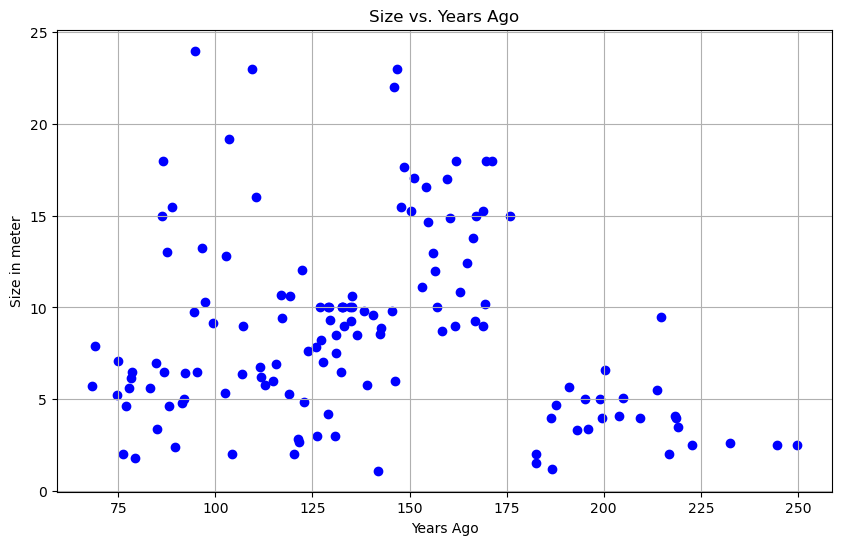

In [11]:
# Grouping size of dinosaur in different average(year ago) value
grouped_avg = dinosaurs.groupby('average')['length_m'].mean()

# plotting values
plt.figure(figsize=(10, 6))
plt.scatter(grouped_avg.index, grouped_avg.values, color='b', marker='o')
plt.title('Size vs. Years Ago')
plt.xlabel('Years Ago')
plt.ylabel('Size in meter')
plt.grid(True)
plt.show()

## By looking at the above scatter plot we see continous rise in average size of dinosaurs from around 230 million years ago to 150 million years ago ie Mid-Triassic to Early Jurassic. Late Jurassic to Mid-Cretaceous (150 to 100 million years ago) is known for its giant sauropods. From 100 to 66 millions year ago ie Late Cretaceous period, dinosaurs reached their peak in terms of diversity and size.

In [12]:
import folium

# Create a map centered at an average location
map = folium.Map(location=[dinosaurs['lat'].mean(), dinosaurs['lng'].mean()], zoom_start=3)

# Add markers for each dinosaur occurrence
for idx, row in dinosaurs.iterrows():
    folium.Marker(location=[row['lat'], row['lng']], 
                  popup=f"{row['name']} ({row['type']})\nLength: {row['length_m']}m\nAge: {row['average']} million years",
                  tooltip=row['name']).add_to(map)

map

ModuleNotFoundError: No module named 'folium'

## The fossile of dinosaurs are found all around the world which prove the super continent theory (ie all continents now divided are once were a single super contient).